In [345]:
import sys
import torch
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme(style="white")

# GDSC Insights

This notebook is intended to get an overview about the data sources provided by the GDSC database.

In [346]:
device = torch.device("cpu")

print(f"""
    Python version:   {sys.version}
    PyTorch version:  {torch.__version__}
    Device:           {device}
    CUDA available:   {torch.cuda.is_available()}
""")


    Python version:   3.10.4 | packaged by conda-forge | (main, Mar 24 2022, 17:45:10) [Clang 12.0.1 ]
    PyTorch version:  1.11.0
    Device:           cpu
    CUDA available:   False



In [347]:
!pwd
!ls -lh ../../datasets/gdsc/screening_data | grep '/\|[xlsx|csv]$' | sort

/Users/cwoest/Documents/Academics/Data_Science_UP/master_thesis/material/GNN-material
-rw-r--r--@ 1 cwoest  staff    11M Apr 27 11:28 GDSC2_fitted_dose_response_25Feb20.xlsx
-rw-r--r--@ 1 cwoest  staff    26M Apr 21 17:03 GDSC1_fitted_dose_response_25Feb20.xlsx
-rw-r--r--@ 1 cwoest  staff   115K Apr 27 11:29 Cell_Lines_Details.xlsx
-rw-r--r--@ 1 cwoest  staff   669M Apr 27 11:31 GDSC1_public_raw_data_25Feb20.csv
-rw-r--r--@ 1 cwoest  staff   826M Apr 27 11:32 GDSC2_public_raw_data_25Feb20.csv


Different __Screening Data__ from the [GDSC's download page](https://www.cancerrxgene.org/downloads/bulk_download) has been saved in the folder above. The description to each file compared to the website is as follows: 
- __Drug Screening - IC50s__
  - __GDSC1-dataset__: `GDSC1_fitted_dose_response_25Feb20.xlsx`
  - __GDSC2-dataset__: `GDSC2_fitted_dose_response_25Feb20.xlsx`
- __Drug Screening - Raw data__: 
  - __GDSC1-raw-data__: `GDSC1_public_raw_data_25Feb20.csv`
  - __GDSC2-raw-data__: `GDSC2_public_raw_data_25Feb20.csv`
- __All cell lines screened__: `Cell_Lines_Details.xlsx`

In the following we will investigate each of these data sources.

## Drug Screening

In [348]:
PATH_TO_GDSC_SCREENING_DATA = '../../datasets/gdsc/screening_data/'

### IC50s

In [12]:
GDSC1_IC50_FILE = 'GDSC1_fitted_dose_response_25Feb20.xlsx'
GDSC2_IC50_FILE = 'GDSC2_fitted_dose_response_25Feb20.xlsx'

In [20]:
# Read the IC50 files.

# GDSC1
start = time.time()
gdsc1_ic50s = pd.read_excel(f'{PATH_TO_GDSC_SCREENING_DATA}{GDSC1_IC50_FILE}', header=0)
print(f"File `{GDSC1_IC50_FILE}` took {time.time()-start:.5f} seconds to import. It has shape {gdsc1_ic50s.shape}")

# GDSC2
start = time.time()
gdsc2_ic50s = pd.read_excel(f'{PATH_TO_GDSC_SCREENING_DATA}{GDSC2_IC50_FILE}', header=0)
print(f"File `{GDSC2_IC50_FILE}` took {time.time()-start:.5f} seconds to import. It has shape {gdsc2_ic50s.shape}")

File `GDSC1_fitted_dose_response_25Feb20.xlsx` took 57.11425 seconds to import. It has shape (310904, 19)
File `GDSC2_fitted_dose_response_25Feb20.xlsx` took 24.19299 seconds to import. It has shape (135242, 19)


In [17]:
gdsc1_ic50s.head(5)

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,281,12974350,683665,MC-CAR,SIDM00636,MM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.395685,0.982114,0.022521,-0.189576
1,GDSC1,281,12975300,684055,ES3,SIDM00265,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.140923,0.984816,0.031840,0.508635
2,GDSC1,281,12975647,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.968757,0.985693,0.026052,1.284229
3,GDSC1,281,12975980,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692768,0.972699,0.110056,0.088760
4,GDSC1,281,12976330,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.478678,0.944462,0.087011,-0.111820


In [18]:
gdsc2_ic50s.head(5)

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,282,13320532,749709,HCC1954,SIDM00872,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,-0.251083,0.975203,0.112373,0.906631
1,GDSC2,282,13320565,749710,HCC1143,SIDM00866,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,1.343315,0.978464,0.067577,1.683567
2,GDSC2,282,13320598,749711,HCC1187,SIDM00885,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,1.736985,0.995100,0.045205,1.875399
3,GDSC2,282,13320631,749712,HCC1395,SIDM00884,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,-2.309078,0.867832,0.107282,-0.096212
4,GDSC2,282,13320668,749713,HCC1599,SIDM00877,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,-3.106684,0.777532,0.098286,-0.484878


- GDSC1 contains $310,904$ rows
- GDSC2 contains $135,242$ rows

Each dataset contains the same $19$ columns. They hold the following informations (which were taken from [here](ftp://ftp.sanger.ac.uk/pub/project/cancerrxgene/releases/current_release/GDSC_Fitted_Data_Description.pdf)):

<details>
  <summary>Click to see column descriptions for "GDSC-dataset":</summary>

| Column | Description |
| ------ | ----------- | 
| `DATASET` |  Name of the dataset. |
| `NLME_RESULT_ID` |  |
| `NLME_CURVE_ID` |  |
| `COSMIC_ID` | Cell identifier from the COSMIC database. |
| `CELL_LINE_NAME` | Primary name for the cell line. |
| `SANGER_MODEL_ID` |  |
| `TCGA_DESC` |  |
| `DRUG_ID` | Unique identifier for a drug. Used for internal lab tracking. |
| `DRUG_NAME` | Primary name for the drug. |
| `PUTATIVE_TARGET` | Putative drug target. |
| `PATHWAY_NAME` |  |
| `COMPANY_ID` |  |
| `WEBRELEASE` |  |
| `MIN_CONC` | Minimum screening concentration of the drug. |
| `MAX_CONC` | Maximum screening concentration of the drug. |
| `LN_IC50` | Natural log of the fitted IC50. To convert to micromolar take the exponent of this value, i.e. $\exp(\text{IC50\_nat\_log})$. |
| `AUC` | Area Under the Curve for the fitted model. Presented as a fraction of the total area between the highest and lowest screening concentration. |
| `RMSE` | Root Mean Squared Error, a measurement of how well the modelled curve fits the data points. |
| `Z_SCORE` | Z score of the LN_IC50 ($x$) comparing it to the mean ($\mu$) and standard deviation ($\sigma^2$) of the LN_IC50 values for the drug in question over all cell lines treated. $Z = \frac{x-\mu}{\sigma^2}$ |

</details>

The tables contain the IC50 values (`LN_IC50`) for specific drugs (`DRUG_NAME`) on cancer cell lines (`CELL_LINE_NAME`). Thus, they hold information about how specific drugs influence the killing of cancer cells.

#### EDA

__Questions to answer__: 

- [x] How many unique drugs, cell-lines and cell-line-drug combinations are there (per database)? 
- [x] How many number of observations does each drug (`DRUG_NAME`) have (per database)? 
- [x] How many number of observations does each cell line (`CELL_LINE_NAME`) have (per database)?
- [x] How are the IC50 values distributed (per database)?

In [330]:
gdsc2_ic50s[['DRUG_ID', 'CELL_LINE_NAME']].shape

(135242, 2)

In [333]:
columns = ['DRUG_NAME', 'CELL_LINE_NAME', ['DRUG_NAME', 'CELL_LINE_NAME'], 'DRUG_ID']

for col in columns:
  gdsc1_uniq, gdsc2_uniq = np.unique(gdsc1_ic50s[col]), np.unique(gdsc2_ic50s[col])

  print(f"""
      Number of unique {col}'s 
          - for GDSC1 is {gdsc1_uniq.size}
          - for GDSC2 is {gdsc2_uniq.size}
          - in total for both is {set(gdsc1_uniq.tolist() + gdsc2_uniq.tolist()).__len__()}
            Thus, {(gdsc1_uniq.size+gdsc2_uniq.size) - set(gdsc1_uniq.tolist() + gdsc2_uniq.tolist()).__len__()} {col}'s are contained in both databases (since the full join is {(gdsc1_uniq.size+gdsc2_uniq.size)}).
  """)


      Number of unique DRUG_NAME's 
          - for GDSC1 is 345
          - for GDSC2 is 192
          - in total for both is 449
            Thus, 88 DRUG_NAME's are contained in both databases (since the full join is 537).
  

      Number of unique CELL_LINE_NAME's 
          - for GDSC1 is 987
          - for GDSC2 is 809
          - in total for both is 988
            Thus, 808 CELL_LINE_NAME's are contained in both databases (since the full join is 1796).
  

      Number of unique ['DRUG_NAME', 'CELL_LINE_NAME']'s 
          - for GDSC1 is 1331
          - for GDSC2 is 1001
          - in total for both is 1436
            Thus, 896 ['DRUG_NAME', 'CELL_LINE_NAME']'s are contained in both databases (since the full join is 2332).
  

      Number of unique DRUG_ID's 
          - for GDSC1 is 367
          - for GDSC2 is 198
          - in total for both is 518
            Thus, 47 DRUG_ID's are contained in both databases (since the full join is 565).
  


In [568]:
# Join both datasets for analysis purposes.
gdsc_ic50s_join = pd.concat([gdsc1_ic50s, gdsc2_ic50s], ignore_index=True)
assert gdsc_ic50s_join[gdsc_ic50s_join.index.duplicated()].shape[0] == 0
assert gdsc_ic50s_join.shape[0] == gdsc1_ic50s.shape[0] + gdsc2_ic50s.shape[0]

- GDSC1-raw contains $5,837,703$ rows
- GDSC2-raw contains $6,646,430$ rows

Each dataset contains the same $18$ columns. They hold the following informations:

<details>
  <summary>Click to see column descriptions:</summary>

| Column | Description |
| ------ | ----------- | 
| `RESEARCH_PROJECT` |  Name of the dataset. |
| `BARCODE` |  |
| `NLME_CURVE_ID` |  |
| `COSMIC_ID` | Cell identifier from the COSMIC database. |
| `CELL_LINE_NAME` | Primary name for the cell line. |
| `SANGER_MODEL_ID` |  |
| `TCGA_DESC` |  |
| `DRUG_ID` | Unique identifier for a drug. Used for internal lab tracking. |
| `DRUG_NAME` | Primary name for the drug. |
| `PUTATIVE_TARGET` | Putative drug target. |
| `PATHWAY_NAME` |  |
| `COMPANY_ID` |  |
| `WEBRELEASE` |  |
| `MIN_CONC` | Minimum screening concentration of the drug. |
| `MAX_CONC` | Maximum screening concentration of the drug. |
| `LN_IC50` | Natural log of the fitted IC50. To convert to micromolar take the exponent of this value, i.e. $\exp(\text{IC50\_nat\_log})$. |
| `AUC` | Area Under the Curve for the fitted model. Presented as a fraction of the total area between the highest and lowest screening concentration. |
| `RMSE` | Root Mean Squared Error, a measurement of how well the modelled curve fits the data points. |
| `Z_SCORE` | Z score of the LN_IC50 ($x$) comparing it to the mean ($\mu$) and standard deviation ($\sigma^2$) of the LN_IC50 values for the drug in question over all cell lines treated. $Z = \frac{x-\mu}{\sigma^2}$ |

</details>

1. We start by investigating the `DRUG_NAME` column.

In [294]:
col = 'DRUG_NAME'

In [295]:
# How many number of observations does each drug have per database? 
gdsc_value_counts = gdsc_ic50s_join[['DATASET', col]].value_counts().to_frame().reset_index()
gdsc_value_counts.rename(columns={0:'counts'}, inplace=True)
gdsc_value_counts.head(-5)

,DATASET,DRUG_NAME,counts
0,GDSC1,Cisplatin,1879
1,GDSC1,AZD7762,1878
2,GDSC1,SN-38,1876
3,GDSC1,PLX-4720,1869
4,GDSC1,Avagacestat,1861
...,...,...,...
527,GDSC2,PF-4708671,49
528,GDSC2,NU7441,48
529,GDSC2,AZD6482,48
530,GDSC2,JQ1,48


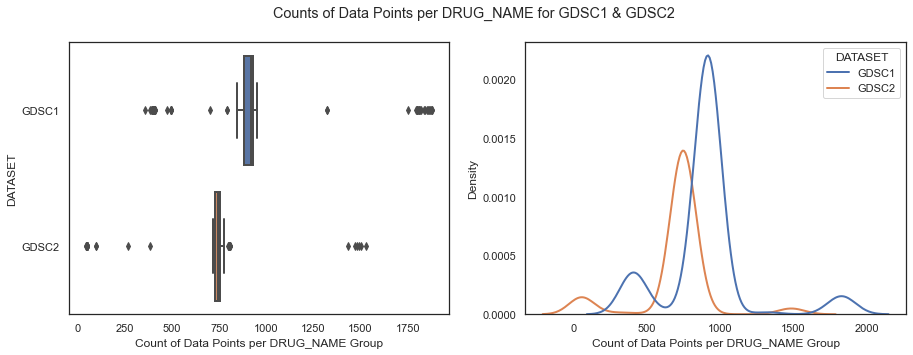

In [296]:
# Distribution of counts per DRUG_NAME.

figure, axs = plt.subplots(1, 2, figsize=(15, 5))
figure.suptitle(f"Counts of Data Points per {col} for GDSC1 & GDSC2")

sns.boxplot(data=gdsc_value_counts, x='counts', y='DATASET', linewidth=2, ax=axs[0]);
axs[0].set_xlabel(f"Count of Data Points per {col} Group");
sns.kdeplot(data=gdsc_value_counts, x='counts', hue='DATASET', linewidth=2, ax=axs[1]);
axs[1].set_xlabel(f"Count of Data Points per {col} Group");

- The counts per cell-line (`DRUG_NAME`) are not different strongly between the two databases.
- Outliers are going in both directions, smaller as well as larger counts. This means, that there are some drugs for which their number of observations is relatively low and some where its relatively high.

In [297]:
describes = []
for db in ['GDSC1', 'GDSC2']:
    print(f"\nDatabase `{db}`\n{15*'-'}")
    describe = gdsc_value_counts[gdsc_value_counts.DATASET==db].counts.describe()
    describes.append(describe)
    print(describe)


Database `GDSC1`
---------------
count     345.000000
mean      901.171014
std       289.660963
min       358.000000
25%       881.000000
50%       917.000000
75%       929.000000
max      1879.000000
Name: counts, dtype: float64

Database `GDSC2`
---------------
count     192.000000
mean      704.385417
std       245.918063
min        44.000000
25%       728.000000
50%       745.000000
75%       752.750000
max      1530.000000
Name: counts, dtype: float64


In [298]:
print(f"The drugs (`{col}`) for")
for i, db in enumerate(['GDSC1', 'GDSC2']):
    print(f""" 
        - {db} have
            - mostly (IQR) between {round(describes[i]['25%'])} and {round(describes[i]['75%'])} observations
            - on average {round(describes[i]['mean'])} observations per drug. This corresponds to {100*round(describes[i]['mean'])/gdsc_ic50s_join[gdsc_ic50s_join.DATASET==db].shape[0]:2.2f}% out of all observations ({gdsc_ic50s_join[gdsc_ic50s_join.DATASET==db].shape[0]}) in {db}.
    """)

The drugs (`DRUG_NAME`) for
 
        - GDSC1 have
            - mostly (IQR) between 881 and 929 observations
            - on average 901 observations per drug. This corresponds to 0.29% out of all observations (310904) in GDSC1.
    
 
        - GDSC2 have
            - mostly (IQR) between 728 and 753 observations
            - on average 704 observations per drug. This corresponds to 0.52% out of all observations (135242) in GDSC2.
    


2. Now we investigate analogous the `CELL_LINE_NAME` column.

In [299]:
col = 'CELL_LINE_NAME'

In [300]:
# How many number of observations does each drug have per database? 
gdsc_cell_line_value_counts = gdsc_ic50s_join[['DATASET', col]].value_counts().to_frame().reset_index()
gdsc_cell_line_value_counts.rename(columns={0:'counts'}, inplace=True)
gdsc_cell_line_value_counts.head(-5)

,DATASET,CELL_LINE_NAME,counts
0,GDSC1,LS-123,367
1,GDSC1,TE-12,367
2,GDSC1,NCI-H1304,367
3,GDSC1,MZ1-PC,367
4,GDSC1,KCL-22,367
...,...,...,...
1786,GDSC1,NCI-H128,41
1787,GDSC1,ECC12,32
1788,GDSC2,NCI-H508,27
1789,GDSC1,KP-N-RT-BM-1,25


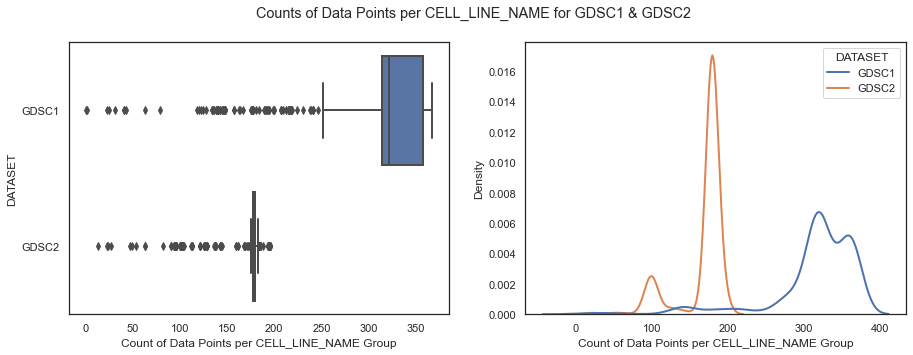

In [301]:
# Distribution of counts per CELL_LINE_NAME.

figure, axs = plt.subplots(1, 2, figsize=(15, 5))
figure.suptitle(f"Counts of Data Points per {col} for GDSC1 & GDSC2")

sns.boxplot(data=gdsc_cell_line_value_counts, x='counts', y='DATASET', linewidth=2, ax=axs[0]);
axs[0].set_xlabel(f"Count of Data Points per {col} Group");
sns.kdeplot(data=gdsc_cell_line_value_counts, x='counts', hue='DATASET', linewidth=2, ax=axs[1]);
axs[1].set_xlabel(f"Count of Data Points per {col} Group");

- The counts per cell-line (`CELL_LINE_NAME`) different strongly between the two databases.
- Outliers are mostly in the directions of smaller counts. This means, that it is more unlikely that cell-lines have relatively low counts.

In [302]:
describes = []
for db in ['GDSC1', 'GDSC2']:
    print(f"\nDatabase `{db}`\n{15*'-'}")
    describe = gdsc_cell_line_value_counts[gdsc_cell_line_value_counts.DATASET==db].counts.describe()
    describes.append(describe)
    print(describe)


Database `GDSC1`
---------------
count    987.000000
mean     314.998987
std       57.980194
min        1.000000
25%      314.000000
50%      322.000000
75%      358.000000
max      367.000000
Name: counts, dtype: float64

Database `GDSC2`
---------------
count    809.000000
mean     167.171817
std       31.114829
min       14.000000
25%      178.000000
50%      179.000000
75%      180.000000
max      196.000000
Name: counts, dtype: float64


In [303]:
print(f"The cell-lines (`{col}`) for")
for i, db in enumerate(['GDSC1', 'GDSC2']):
    print(f""" 
        - {db} have
            - mostly (IQR) between {round(describes[i]['25%'])} and {round(describes[i]['75%'])} observations
            - on average {round(describes[i]['mean'])} observations per cell-line. This corresponds to {100*round(describes[i]['mean'])/gdsc_ic50s_join[gdsc_ic50s_join.DATASET==db].shape[0]:2.2f}% out of all observations ({gdsc_ic50s_join[gdsc_ic50s_join.DATASET==db].shape[0]}) in {db}.
    """)

The cell-lines (`CELL_LINE_NAME`) for
 
        - GDSC1 have
            - mostly (IQR) between 314 and 358 observations
            - on average 315 observations per cell-line. This corresponds to 0.10% out of all observations (310904) in GDSC1.
    
 
        - GDSC2 have
            - mostly (IQR) between 178 and 180 observations
            - on average 167 observations per cell-line. This corresponds to 0.12% out of all observations (135242) in GDSC2.
    


3. Investigation of the distribution of IC50 values.

In [315]:
# Compare general IC50 distribution for both GDSC datasets.
print("IC50 Distributions:")
describes = []
for db in ['GDSC1', 'GDSC2']:
    print(f"\nDatabase `{db}`\n{15*'-'}")
    describe = np.exp(gdsc_ic50s_join[gdsc_ic50s_join.DATASET==db].LN_IC50).describe()
    describes.append(describe)
    print(describe)

IC50 Distributions:

Database `GDSC1`
---------------
count    310904.000000
mean         95.630224
std        1283.228019
min           0.000025
25%           2.063189
50%          11.918031
75%          51.187162
max      233061.116330
Name: LN_IC50, dtype: float64

Database `GDSC2`
---------------
count    135242.000000
mean        112.417733
std         359.033028
min           0.000183
25%           3.176831
50%          19.879062
75%          92.973755
max       23722.731441
Name: LN_IC50, dtype: float64


In [317]:
print(f"The IC50 values for")
for i, db in enumerate(['GDSC1', 'GDSC2']):
    print(f""" 
        - {db} have
            - mostly (IQR) a value between {round(describes[i]['25%'])} and {round(describes[i]['75%'])}
            - on average a value of {round(describes[i]['mean'])}.
    """)

The IC50 values for
 
        - GDSC1 have
            - mostly (IQR) a value between 2 and 51
            - on average a value of 96.
    
 
        - GDSC2 have
            - mostly (IQR) a value between 3 and 93
            - on average a value of 112.
    


_Note_: 
- If the IC50 value is high, this indicates that the cell line developed a resistent to the agent (drug).

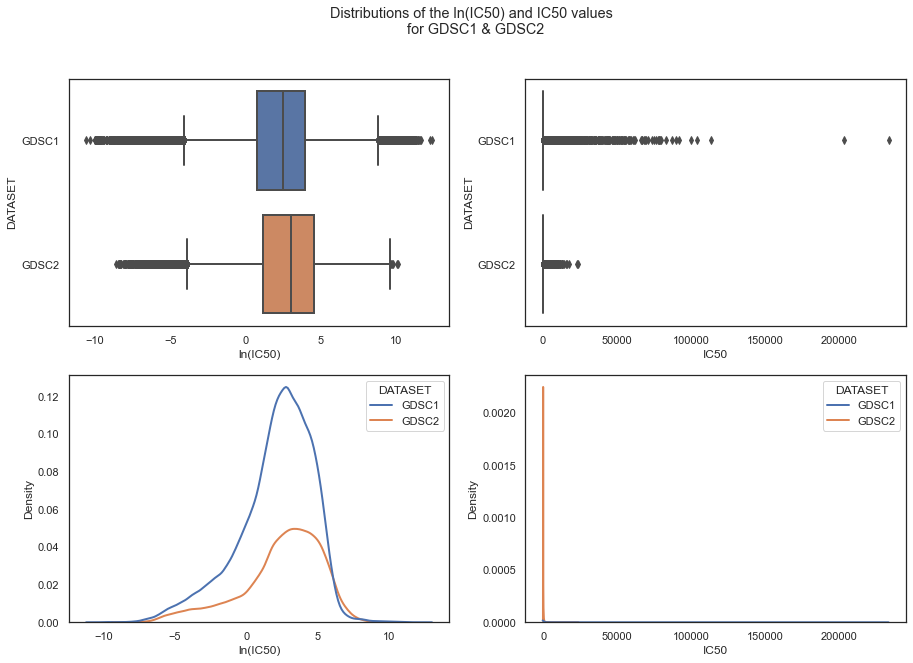

In [305]:
# Distribution of the IC50 values.

figure, axs = plt.subplots(2, 2, figsize=(15, 10))
figure.suptitle(f"Distributions of the ln(IC50) and IC50 values \n for GDSC1 & GDSC2")

sns.boxplot(data=gdsc_ic50s_join, y='DATASET', x='LN_IC50', linewidth=2, ax=axs[0, 0]);
axs[0, 0].set_xlabel(f"ln(IC50)");
sns.boxplot(y=gdsc_ic50s_join.DATASET, x=np.exp(gdsc_ic50s_join.LN_IC50), linewidth=2, ax=axs[0, 1]);
axs[0, 1].set_xlabel(f"IC50");
sns.kdeplot(data=gdsc_ic50s_join, hue='DATASET', x='LN_IC50', linewidth=2, ax=axs[1, 0]);
axs[1, 0].set_xlabel(f"ln(IC50)");
sns.kdeplot(hue=gdsc_ic50s_join.DATASET, x=np.exp(gdsc_ic50s_join.LN_IC50), linewidth=2, ax=axs[1, 1]);
axs[1, 1].set_xlabel(f"IC50");

- The distribution of the $ln(IC50)$ values is very similar between the two databases GDSC1 and GDSC2.
- There are a lot of outliers existent. Thus many cell-lines developed resistence against a specific drug. However, for now it is unclear if this conclusion can also be made for very few cell-lines but a lot of drugs or for many cell-lines but then only for a few drugs.

### Raw Data

In [320]:
GDSC1_RAW_FILE = 'GDSC1_public_raw_data_25Feb20.csv'
GDSC2_RAW_FILE = 'GDSC2_public_raw_data_25Feb20.csv'

In [321]:
# Read the raw files.

# GDSC1
start = time.time()
gdsc1_raw = pd.read_csv(f'{PATH_TO_GDSC_SCREENING_DATA}{GDSC1_RAW_FILE}', header=0)
print(f"File `{GDSC1_RAW_FILE}` took {time.time()-start:.5f} seconds to import. It has shape {gdsc1_raw.shape}")

# GDSC2
start = time.time()
gdsc2_raw = pd.read_csv(f'{PATH_TO_GDSC_SCREENING_DATA}{GDSC2_RAW_FILE}', header=0)
print(f"File `{GDSC2_RAW_FILE}` took {time.time()-start:.5f} seconds to import. It has shape {gdsc2_raw.shape}")

/var/folders/kv/l0jzxgbj1kggff_kd35bfzkw0000gn/T/ipykernel_76610/2232287772.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  gdsc1_raw = pd.read_csv(f'{PATH_TO_GDSC_SCREENING_DATA}{GDSC1_RAW_FILE}', header=0)


File `GDSC1_public_raw_data_25Feb20.csv` took 12.63593 seconds to import. It has shape (5837703, 18)
File `GDSC2_public_raw_data_25Feb20.csv` took 13.52708 seconds to import. It has shape (6646430, 18)


In [322]:
gdsc1_raw.head(5)

,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,DRUG_ID,CONC,INTENSITY
0,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,1,B,NaN,NaN,26022
1,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,2,B,NaN,NaN,20491
2,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,3,UN-USED,NaN,NaN,181946
3,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,4,UN-USED,NaN,NaN,213387
4,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,5,UN-USED,NaN,NaN,166452


In [323]:
gdsc2_raw.head(5)

,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,DRUG_ID,CONC,INTENSITY
0,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,250,159,Glo,4,1,UN-USED,NaN,NaN,0
1,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,250,159,Glo,4,2,UN-USED,NaN,NaN,0
2,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,250,159,Glo,4,3,UN-USED,NaN,NaN,398
3,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,250,159,Glo,4,4,UN-USED,NaN,NaN,796
4,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,250,159,Glo,4,5,UN-USED,NaN,NaN,796


- GDSC1-raw contains $5,837,703$ rows
- GDSC2-raw contains $6,646,430$ rows

Each dataset contains the same $18$ columns. They hold the following informations (which were taken from [here](ftp://ftp.sanger.ac.uk/pub/project/cancerrxgene/releases/current_release/GDSC_Raw_Data_Description.pdf)):

<details>
  <summary>Click to see column descriptions for "GDSC-raw-data":</summary>

| Column | Description |
| ------ | ----------- | 
| `RESEARCH_PROJECT` | Project name for the dataset. |
| `BARCODE` | Unique barcode for screening assay plate |
| `SCAN_ID` | Unique id for the scan of the plate by the plate reader - fluorescence measurement data. A plate might be scanned more than once but only one `SCAN_ID` will pass internal QC. Therefore there is a one to one correspondence between `BARCODE` and `SCAN_ID` in the published data. |
| `DATE_CREATED` | Date that the plate was seeded with cell line. |
| `SCAN_DATE` | Date the experiment finished and measurement was taken (scanning). |
| `CELL_ID` | Unique GDSC identifier for the cell line expansion seeded on the plate. Each time a cell line is expanded from frozen stocks it is assigned a new `CELL_ID`. | 
| `MASTER_CELL_ID` | Unique GDSC identifier for the cell line seeded on the plate. A particular cell line will have a single `MASTER_CELL_ID` but can have multiple `CELL_ID`. | 
| `COSMIC_ID` | Identifier of the cell line in the COSMIC database if available. There is a one to one correspondence between `MASTER_CELL_ID` and `COSMIC_ID`. | 
| `CELL_LINE_NAME` | Name of the plated cell line. Again this will have a one to one correspondence with `MASTER_CELL_ID`. | 
| `SEEDING_DENSITY` | Number of cells seeded per well of screening plate. This number is the same for all wells on a plate. | 
| `DRUGSET_ID` | The set of drugs used to treat the plate and the associated plate layout. | 
| `ASSAY` | End point assay type used to assess cell viability, e.g., Glo is Promega CellTiter-Glo. | 
| `DURATION` | Duration of the assay in days from cell line drug treatment to end point measurement. | 
| `POSITION` | Plate well position numbered row-wise. 1536 well plates have 48 columns and 384 well plates have 24. | 
| `TAG` | Label to identify well treatment - see description below. It is possible to have more than one tag per well `POSITION` such that in the raw data files (csv) there may be more than one row per plate well position, e.g., L12-D1-S + DMSO. | 
| `DRUG_ID` | Unique identifier for the drug used for treatment. In the absence of a drug treatment, e.g., a negative control this field will be NA. | 
| `CONC` | Micromolar concentration of the drug id used for treatment. As with `DRUG_ID` this field can be NA. | 
| `INTENSITY` | Fluorescence measurement at the end of the assay. The fluorescence is a result of `ASSAY` and is an indicator of cell viability. | 

</details>

The table contains information about the concentration and intensity of a drug (`DRUG_ID`) in a specific cell line (`CELL_LINE_NAME`). Specifically it contains infromation about experiments which lead to this information.

In [324]:
# Join both datasets for analysis purposes.
gdsc_raw_join = pd.concat([gdsc1_raw, gdsc2_raw], ignore_index=True)
assert gdsc_raw_join[gdsc_raw_join.index.duplicated()].shape[0] == 0
assert gdsc_raw_join.shape[0] == gdsc1_raw.shape[0] + gdsc2_raw.shape[0]

In [325]:
columns = ['RESEARCH_PROJECT', 'CELL_LINE_NAME', 'DRUG_ID']

for col in columns:
  gdsc1_uniq, gdsc2_uniq = np.unique(gdsc1_raw[col]), np.unique(gdsc2_raw[col])

  print(f"""
      Number of unique {col}'s 
          - for GDSC1 is {gdsc1_uniq.size}
          - for GDSC2 is {gdsc2_uniq.size}
          - in total for both is {set(gdsc1_uniq.tolist() + gdsc2_uniq.tolist()).__len__()}
            Thus, {(gdsc1_uniq.size+gdsc2_uniq.size) - set(gdsc1_uniq.tolist() + gdsc2_uniq.tolist()).__len__()} {col}'s are contained in both databases (since the full join is {(gdsc1_uniq.size+gdsc2_uniq.size)}).
  """)


      Number of unique RESEARCH_PROJECT's 
          - for GDSC1 is 2
          - for GDSC2 is 10
          - in total for both is 12
            Thus, 0 RESEARCH_PROJECT's are contained in both databases (since the full join is 12).
  

      Number of unique CELL_LINE_NAME's 
          - for GDSC1 is 987
          - for GDSC2 is 809
          - in total for both is 988
            Thus, 808 CELL_LINE_NAME's are contained in both databases (since the full join is 1796).
  

      Number of unique DRUG_ID's 
          - for GDSC1 is 368
          - for GDSC2 is 200
          - in total for both is 521
            Thus, 47 DRUG_ID's are contained in both databases (since the full join is 568).
  


- We can see that for the columns `CELL_LINE_NAME` & `DRUG_ID` the numbers of unique values for each database __are exactly the same as they were for the IC50 files from the `IC50s` section from above__.

To validate that the cell-lines and drug ID's are actually the same we check if there are even any cell-lines and/or drugs which are in the raw files but not in the ic50 files, or vice versa.

In [340]:
assert not set(np.unique(gdsc1_raw.CELL_LINE_NAME)) - set(np.unique(gdsc1_ic50s.CELL_LINE_NAME))
assert not set(np.unique(gdsc2_raw.CELL_LINE_NAME)) - set(np.unique(gdsc2_ic50s.CELL_LINE_NAME))

Thus, 
- the table in `GDSC1_fitted_dose_response_25Feb20.xlsx` holds exactly the same set of cell-lines (`CELL_LINE_NAME`) & drugs (`DRUG_ID`) as `GDSC1_public_raw_data_25Feb20.csv`.
- the table in `GDSC2_fitted_dose_response_25Feb20.xlsx` holds exactly the same set of cell-lines (`CELL_LINE_NAME`) & drugs (`DRUG_ID`) as `GDSC2_public_raw_data_25Feb20.csv`.

> __Conclusion__: we can inner join the raw table with the ic50 table on either cell-lines or drugs, without loosing any observations.

---
## Join GDSC Data

In this step we join GDSC raw data with the IC50 data.

In [573]:
# First, we take a look at both - already joined (GDSC1 & GDSC2) - tables. 
# Raw table, from GDSC{1,2}_public_raw_data_25Feb20.csv
gdsc_raw_join.head(3)

,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,DRUG_ID,CONC,INTENSITY
0,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,1,B,NaN,NaN,26022
1,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,2,B,NaN,NaN,20491
2,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,3,UN-USED,NaN,NaN,181946


In [574]:
# IC50s table, from GDSC{1,2}_fitted_dose_response_25Feb20.xlsx
gdsc_ic50s_join.head(3)

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,281,12974350,683665,MC-CAR,SIDM00636,MM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.395685,0.982114,0.022521,-0.189576
1,GDSC1,281,12975300,684055,ES3,SIDM00265,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.140923,0.984816,0.031840,0.508635
2,GDSC1,281,12975647,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.968757,0.985693,0.026052,1.284229


In [578]:
# Check for columns which are in both tables. We could join on these columns.
list(set(gdsc_raw_join.columns) - (set(gdsc_raw_join.columns) - set(gdsc_ic50s_join.columns)))

['COSMIC_ID', 'CELL_LINE_NAME', 'DRUG_ID']

We will join on the tuple (`CELL_LINE_NAME`, `DRUG_ID`). 
- We left join the raw data on the IC50 data to have possibly the concentration of the drug. 

In [592]:
cols_to_join_on = ['CELL_LINE_NAME', 'DRUG_ID']
gdsc_ic50_raw_join = gdsc_ic50s_join.merge(gdsc_raw_join,
                                           on=cols_to_join_on,
                                           how='left',
                                           suffixes=['_ic50', '_raw'])
print(gdsc_ic50_raw_join.shape)

if gdsc_ic50_raw_join.shape[0] > gdsc_ic50s_join.shape[0]:
    print(f"""There are multiple {cols_to_join_on} entries in the raw GDSC table which match with the IC50 GDSC table.
        number of rows after left join   : {gdsc_ic50_raw_join.shape[0]}
        number of rows in the IC50 table : {gdsc_ic50s_join.shape[0]}
        number of rows in the raw table  : {gdsc_raw_join.shape[0]}
    """)

(5707271, 35)
There are multiple ['CELL_LINE_NAME', 'DRUG_ID'] entries in the raw GDSC table which match with the IC50 GDSC table.
        number of rows after left join   : 5707271
        number of rows in the IC50 table : 446146
        number of rows in the raw table  : 12484133
    


In [594]:
gdsc_ic50_raw_join.head(3)

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID_ic50,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,...,MASTER_CELL_ID,COSMIC_ID_raw,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,CONC,INTENSITY
0,GDSC1,281,12974350,683665,MC-CAR,SIDM00636,MM,1,Erlotinib,EGFR,...,49,683665,NaN,410_a_9,s,3.0,14,L1-D1-S,2.0,544404
1,GDSC1,281,12974350,683665,MC-CAR,SIDM00636,MM,1,Erlotinib,EGFR,...,49,683665,NaN,410_a_9,s,3.0,15,L1-D2-S,1.0,599897
2,GDSC1,281,12974350,683665,MC-CAR,SIDM00636,MM,1,Erlotinib,EGFR,...,49,683665,NaN,410_a_9,s,3.0,16,L1-D3-S,0.5,587627


In [595]:
gdsc_ic50_raw_join.columns

Index(['DATASET', 'NLME_RESULT_ID', 'NLME_CURVE_ID', 'COSMIC_ID_ic50',
       'CELL_LINE_NAME', 'SANGER_MODEL_ID', 'TCGA_DESC', 'DRUG_ID',
       'DRUG_NAME', 'PUTATIVE_TARGET', 'PATHWAY_NAME', 'COMPANY_ID',
       'WEBRELEASE', 'MIN_CONC', 'MAX_CONC', 'LN_IC50', 'AUC', 'RMSE',
       'Z_SCORE', 'RESEARCH_PROJECT', 'BARCODE', 'SCAN_ID', 'DATE_CREATED',
       'SCAN_DATE', 'CELL_ID', 'MASTER_CELL_ID', 'COSMIC_ID_raw',
       'SEEDING_DENSITY', 'DRUGSET_ID', 'ASSAY', 'DURATION', 'POSITION', 'TAG',
       'CONC', 'INTENSITY'],
      dtype='object')

We can exlude the following columns since they probably are not useful as features for building a model.


In [611]:
cols_to_exclude = [
    # From IC50 table.
    'NLME_RESULT_ID',
    'NLME_CURVE_ID',
    'SANGER_MODEL_ID',
    'TCGA_DESC',
    'PUTATIVE_TARGET',
    'PATHWAY_NAME',
    'COMPANY_ID',
    'MIN_CONC',
    'MAX_CONC',
    # From RAW table.
    'WEBRELEASE',
    'RESEARCH_PROJECT',
    'BARCODE', 
    'SCAN_ID', 
    'DATE_CREATED',
    'SCAN_DATE',
    'COSMIC_ID_raw',
    'DRUGSET_ID',
    'ASSAY',
    'TAG'
]

In [616]:
gdsc_sparsed_cols = gdsc_ic50_raw_join[list(set(gdsc_ic50_raw_join.columns) - set(cols_to_exclude))]
gdsc_sparsed_cols = gdsc_sparsed_cols.rename(columns={'COSMIC_ID_ic50': 'COSMIC_ID'})
gdsc_sparsed_cols.shape

(5707271, 16)

In [621]:
gdsc_sparsed_cols.head(10)

,MASTER_CELL_ID,CELL_ID,CONC,CELL_LINE_NAME,RMSE,SEEDING_DENSITY,AUC,INTENSITY,COSMIC_ID,DRUG_NAME,POSITION,DATASET,Z_SCORE,DURATION,LN_IC50,DRUG_ID
0,49,3137,2.000000,MC-CAR,0.022521,NaN,0.982114,544404,683665,Erlotinib,14,GDSC1,-0.189576,3.0,2.395685,1
1,49,3137,1.000000,MC-CAR,0.022521,NaN,0.982114,599897,683665,Erlotinib,15,GDSC1,-0.189576,3.0,2.395685,1
2,49,3137,0.500000,MC-CAR,0.022521,NaN,0.982114,587627,683665,Erlotinib,16,GDSC1,-0.189576,3.0,2.395685,1
3,49,3137,0.250000,MC-CAR,0.022521,NaN,0.982114,597272,683665,Erlotinib,17,GDSC1,-0.189576,3.0,2.395685,1
4,49,3137,0.125000,MC-CAR,0.022521,NaN,0.982114,594490,683665,Erlotinib,18,GDSC1,-0.189576,3.0,2.395685,1
5,49,3137,0.062500,MC-CAR,0.022521,NaN,0.982114,590598,683665,Erlotinib,19,GDSC1,-0.189576,3.0,2.395685,1
6,49,3137,0.031250,MC-CAR,0.022521,NaN,0.982114,583650,683665,Erlotinib,20,GDSC1,-0.189576,3.0,2.395685,1
7,49,3137,0.015625,MC-CAR,0.022521,NaN,0.982114,583491,683665,Erlotinib,21,GDSC1,-0.189576,3.0,2.395685,1
8,49,3137,0.007812,MC-CAR,0.022521,NaN,0.982114,586185,683665,Erlotinib,22,GDSC1,-0.189576,3.0,2.395685,1
9,1342,2366,2.000000,ES3,0.031840,NaN,0.984816,404197,684055,Erlotinib,14,GDSC1,0.508635,3.0,3.140923,1


- There are clearly many observations per (`CELL_LINE_NAME`, `DRUG_ID`) since there are now different values for different concentrations. 

Let's check in the following how the number of duplicated rows, which only differ in `CONC` and `INTENSITY`, are distributed.

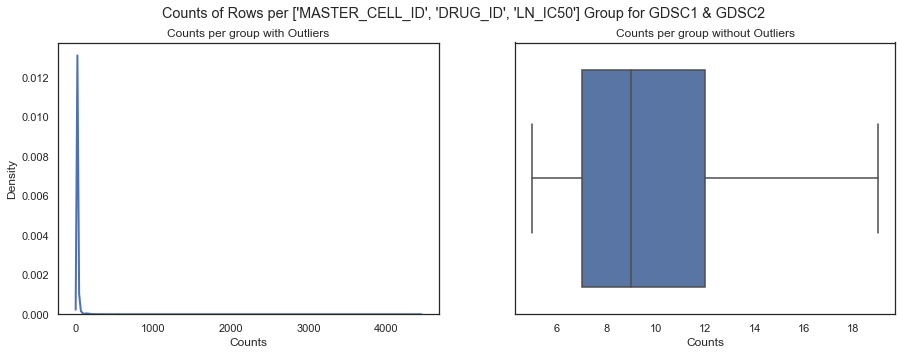

In [636]:
# Distribution of counts per ('MASTER_CELL_ID', 'DRUG_ID', 'LN_IC50').
group_cols = ['MASTER_CELL_ID', 'DRUG_ID', 'LN_IC50']

figure, axs = plt.subplots(1, 2, figsize=(15, 5))
figure.suptitle(f"Counts of Rows per {group_cols} Group for GDSC1 & GDSC2")

sns.kdeplot(data=gdsc_sparsed_cols.groupby(group_cols).size().reset_index(name='Counts'), 
            x='Counts', linewidth=2, ax=axs[0]);
axs[0].set_title("Counts per group with Outliers");

sns.boxplot(data=gdsc_sparsed_cols.groupby(group_cols).size().reset_index(name='Counts'), 
            x='Counts', showfliers=False, ax=axs[1]);
axs[1].set_title("Counts per group without Outliers");

- Mostly we have between 7 and 12 observations per group.
- This means there are mostly between 7 and 12 different concentrations and/or intensities per cell-line, drug tuple.

---

# Cell-lines

In [343]:
!pwd
!ls -lh ../../datasets/gdsc/screening_data | grep '/\|xlsx$' | sort

/Users/cwoest/Documents/Academics/Data_Science_UP/master_thesis/material/GNN-material
-rw-r--r--@ 1 cwoest  staff    11M Apr 27 11:28 GDSC2_fitted_dose_response_25Feb20.xlsx
-rw-r--r--@ 1 cwoest  staff    26M Apr 21 17:03 GDSC1_fitted_dose_response_25Feb20.xlsx
-rw-r--r--@ 1 cwoest  staff   115K Apr 27 11:29 Cell_Lines_Details.xlsx


In this section we will investigate the `Cell_Lines_Details.xlsx` file.

In [349]:
CELL_LINE_DETAILS_FILE = 'Cell_Lines_Details.xlsx'

In [351]:
start = time.time()
gdsc_cellline_details = pd.read_excel(f'{PATH_TO_GDSC_SCREENING_DATA}{CELL_LINE_DETAILS_FILE}', header=0)
print(f"File `{CELL_LINE_DETAILS_FILE}` took {time.time()-start:.5f} seconds to import. It has shape {gdsc_cellline_details.shape}")
gdsc_cellline_details.head(5)

File `Cell_Lines_Details.xlsx` took 0.21714 seconds to import. It has shape (1002, 13)


/users/cwoest/Applications/anaconda3/envs/master-thesis-log/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent


- The complete table contains information about all screened cell-lines.
- Every row contains information about one cell-line.

---

# Features

In this section we are trying to map feature information to the tables from above. A list of data resources for such features can be found in [here](https://www.cancerrxgene.org/gdsc1000/GDSC1000_WebResources/Home.html).

In [356]:
PATH_TO_GDSC_DATASETS = '../../datasets/gdsc/'

## Gene Expression Data

In [361]:
!pwd
!ls -lh ../../datasets/gdsc | grep '/\|[xlsx,csv,txt,zip]$' | sort

/Users/cwoest/Documents/Academics/Data_Science_UP/master_thesis/material/GNN-material
-rw-r--r--@ 1 cwoest  staff    37M Apr 28 10:01 TableS2C.xlsx
-rw-r--r--@ 1 cwoest  staff   203K Apr 28 10:01 TableS2G.xlsx
-rw-r--r--@ 1 cwoest  staff   292M Apr 15  2015 Cell_line_RMA_proc_basalExp.txt


The file `Cell_line_RMA_proc_basalExp.txt` is extracted from the zip file provided under the _Dataset_ link in [here](https://www.cancerrxgene.org/gdsc1000/GDSC1000_WebResources/Home.html) for the entry

| Omic | DataType | Objects | Keywords | Details | Data item | 
| ---- | -------- | ------- | -------- | ------- | --------- | 
| `EXP`| Preprocessed | Cell-lines | RMA normalised expression data for cell-lines | RMA normalised basal expression profiles for all the cell-lines | [Dataset](https://www.cancerrxgene.org/gdsc1000/GDSC1000_WebResources//Data/preprocessed/Cell_line_RMA_proc_basalExp.txt.zip) |

In [422]:
start = time.time()
gdsc_gene_expression = pd.read_csv(PATH_TO_GDSC_DATASETS + 'Cell_line_RMA_proc_basalExp.txt', sep="\t")
print(f"File `Cell_line_RMA_proc_basalExp.txt` took {time.time()-start:.5f} seconds to import. It has shape {gdsc_gene_expression.shape}")
gdsc_gene_expression.head(3)

File `Cell_line_RMA_proc_basalExp.txt` took 4.49845 seconds to import. It has shape (17737, 1020)


,GENE_SYMBOLS,GENE_title,DATA.906826,DATA.687983,DATA.910927,DATA.1240138,DATA.1240139,DATA.906792,DATA.910688,DATA.1240135,...,DATA.753584,DATA.907044,DATA.998184,DATA.908145,DATA.1659787,DATA.1298157,DATA.1480372,DATA.1298533,DATA.930299,DATA.905954.1
0,TSPAN6,tetraspanin 6 [Source:HGNC Symbol;Acc:11858],7.632023,7.548671,8.712338,7.797142,7.729268,7.074533,3.285198,6.961606,...,7.105637,3.236503,3.038892,8.373223,6.932178,8.441628,8.422922,8.089255,3.112333,7.153127
1,TNMD,tenomodulin [Source:HGNC Symbol;Acc:17757],2.964585,2.777716,2.643508,2.817923,2.957739,2.889677,2.828203,2.874751,...,2.798847,2.745137,2.976406,2.852552,2.622630,2.639276,2.879890,2.521169,2.870468,2.834285
2,DPM1,dolichyl-phosphate mannosyltransferase polypep...,10.379553,11.807341,9.880733,9.883471,10.418840,9.773987,10.264385,10.205931,...,10.486486,10.442951,10.311962,10.454830,10.418475,11.463742,10.557777,10.792750,9.873902,10.788218


The table in `Cell_line_RMA_proc_basalExp.txt` contains
- information about the gene expression for specific `COSMIC_ID`'s 

## Mapping

In [384]:
from external.gdsc_utils.GDSC_utils import get_gdsc_gene_expression

In [509]:
from typing import Optional, Set
import io 
from pandas._libs.parsers import ParserError

def get_gdsc_gene_expression(
    
    genes: Optional[Set] = None,
    path_cell_annotations: str = "data/GDSC/Cell_Lines_Details.csv",
    path_gene_expression: str = "data/GDSC/Cell_line_RMA_proc_basalExp.txt",
):
    """
    Return the gene expression dataframe(n_cells x n_genes)
    for a set of gene symbols for all cell_lines of the GDSC cell line annotation file.
    If the genes are None, return the data for all genes.
    """

    gene_expression = pd.read_csv(path_gene_expression, sep="\t")

    gene_expression = gene_expression.rename(columns={'GENE_SYMBOLS': 'Sample Name'}, level=0)

    gene_expression = gene_expression.drop(["GENE_title"], axis=1).set_index(
        "Sample Name"
    )
    gene_expression.index = gene_expression.index.astype(str)

    # refactor column names to cosmic id and then map to cell-line name
    ge_columns = [
        x.split("DATA.")[1] for x in list(gene_expression.columns)
    ]  # remove "DATA" prefix
    ge_columns = cosmic_ids_to_cell_line_names(
        ge_columns, path_cell_annotations=path_cell_annotations
    )
    gene_expression.columns = ge_columns.astype(str)

    if genes is None:
        return gene_expression.T
    else:
        # filter out the genes
        number_of_queried_genes = len(genes)
        genes = set(gene_expression.index) & genes
        print(
            f"no data for {number_of_queried_genes - len(genes)} of {number_of_queried_genes} queried genes."
        )
        gene_expression = gene_expression.loc[genes]

    return gene_expression.T

def cosmic_ids_to_cell_line_names(
    cosmic_ids, path_cell_annotations="data/GDSC/Cell_Lines_Details.csv"
):
    """
    transform a list of COSMIC ID's to a series of cell-line-names, indexed by the cosmic ID
    using the cell annotations from https://www.cancerrxgene.org/downloads/bulk_download

    """

    try:
        if path_cell_annotations[-4:] == '.csv': 
            cell_line_data = pd.read_csv(path_cell_annotations, index_col=0)
        elif path_cell_annotations[-5:] == '.xlsx':
            cell_line_data = pd.read_excel(path_cell_annotations)
    except ParserError:
        csv_data = open(path_cell_annotations).read().replace("\r\n", "\n")
        cell_line_data = pd.read_csv(io.StringIO(csv_data), encoding="unicode_escape")

    cosmic_ids_to_cell_line_name_dict = pd.Series(
        cell_line_data["Sample Name"].values,
        index=cell_line_data["COSMIC identifier"].fillna(-1).astype(int).values,
    ).to_dict()

    cell_line_names = []
    unknown_cell_line_names = []
    for cosmic_id in cosmic_ids:
        try:

            cell_line_names.append(cosmic_ids_to_cell_line_name_dict[int(cosmic_id)])

        except (KeyError, ValueError):
            cell_line_names.append("unknown_cosmic_" + str(cosmic_id))
            unknown_cell_line_names.append(cosmic_id)

    if unknown_cell_line_names:
        print(
            "Note: "
            + str(len(unknown_cell_line_names))
            + " Cosmic IDs not found in cell annotation data: "
        )
        print(unknown_cell_line_names)

    # check if cell_line_names are unique
    unique_c = []
    dup_c = []
    for c in cell_line_names:
        if not (c in unique_c):
            unique_c.append(c)
        else:
            dup_c.append(c)
    if dup_c:
        print(
            "Warning: at least two cosmic IDs map to the same cell lines for the cell lines: "
        )
        print(dup_c)

    return pd.Series(cell_line_names, index=cosmic_ids)

In [510]:
# Return the gene expression dataframe(n_cells x n_genes) for a set of gene symbols for all cell_lines of the GDSC cell line annotation file.
# If the genes are None, return the data for all genes.
gene_expr = get_gdsc_gene_expression(
    path_cell_annotations=f'{PATH_TO_GDSC_SCREENING_DATA}{CELL_LINE_DETAILS_FILE}',
    path_gene_expression=PATH_TO_GDSC_DATASETS + 'Cell_line_RMA_proc_basalExp.txt'
)

Note: 50 Cosmic IDs not found in cell annotation data: 
['906815', '1330955', '907284', '1330944', '1330943', '1298232', '1299076', '1299051', '906829', '1290773', '907049', '909730', '910946', '907391', '687509', '1327761', '753536', '1240152', '925342', '687814', '1479994', '1479991', '1298355', '1331026', '1298150', '1479993', '11223344', '1330945', '1479992', '998179', '1331060', '1331028', '1503362.1', '906850', '1240211', '1299049', '908119', '1331031', '907785', '1330983.1', '906867', '1723793', '1723794', '1240156', '1299067', '906803', '1298154', '909976.1', '1659787', '905954.1']


/users/cwoest/Applications/anaconda3/envs/master-thesis-log/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [511]:
gene_expr.shape

(1018, 17737)

- There are $1,018$  cell-lines (rows in `gene_expr`)
- Per cell-line there are gene expressions of $17,736$ genes (columns in `gene_expr`)

In [512]:
gene_expr.head(5)

Sample Name,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,LINC00526,PPY2,nan,nan,KRT18P55,nan,POLRMTP1,UBL5P2,TBC1D3P5,nan
CAL-120,7.632023,2.964585,10.379553,3.614794,3.380681,3.324692,3.566350,8.204530,5.235118,5.369039,...,6.786925,2.997054,3.109774,7.882377,3.331134,2.852537,3.130696,9.986616,3.073724,7.284733
DMS-114,7.548671,2.777716,11.807341,4.066887,3.732485,3.152404,7.827172,6.616972,5.809264,7.209653,...,5.317911,3.263745,3.059424,8.681302,2.992611,2.776771,3.260982,9.002814,3.000182,8.504804
CAL-51,8.712338,2.643508,9.880733,3.956230,3.236620,3.241246,2.931034,8.191246,5.426841,5.120747,...,3.143006,3.112145,2.930254,8.707886,2.886574,2.685307,3.176239,9.113243,2.916274,7.059092
H2869,7.797142,2.817923,9.883471,4.063701,3.558414,3.101247,7.211707,8.630643,5.617714,4.996434,...,3.153896,3.151576,2.850726,7.872535,3.812119,3.436412,3.074432,9.958284,3.256500,7.318125
H290,7.729268,2.957739,10.418840,4.341500,3.840373,3.001802,3.375422,8.296950,5.669418,4.180205,...,3.652660,2.918475,2.849537,8.945953,3.412586,2.951270,3.213545,9.938978,3.396126,7.726867


- Each `COSMIC_ID` has a corresponding `SAMPLE Name` in the `Cell_Lines_Details.xlsx` file, which is in the `gdsc_cellline_details` variable.
- Each column in the variable `gene_expr` thus now holds per column the `COSMIC_ID` or `SAMPLE Name` respectively.
- Rememeber: that `COSMIC_ID` <-> `MASTER_CELL_ID`
- Each cell-line (`SAMPLE_NAME`) contains in the row gene expression levels for different genes. 

> __Summary__: The dataset `gene_expr` holds now feature information in the sense of the gene expression level (`TSPAN6`, `TNMD`, ...) per cell-line (`Sample Name`).

In [415]:
# The `gene_expr` table is a map from the cell-lines to the gene expression. It uses the the following two tables for that:
# - gdsc_cellline_details : from 'Cell_Lines_Details.xlsx'
# - gdsc_gene_expression  : from 'Cell_line_RMA_proc_basalExp.txt'
gdsc_cellline_details.head(5)

,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent


In [412]:
# Here, except the 1st column, all other columns have as headers 'DATA.<COSMIC identifier>' where COSMIS identifier can be mapped to the Cell Line Details table.
gdsc_gene_expression.loc[:, gdsc_gene_expression.columns != 'GENE_title'].head(5)

,GENE_SYMBOLS,DATA.906826,DATA.687983,DATA.910927,DATA.1240138,DATA.1240139,DATA.906792,DATA.910688,DATA.1240135,DATA.1290812,...,DATA.753584,DATA.907044,DATA.998184,DATA.908145,DATA.1659787,DATA.1298157,DATA.1480372,DATA.1298533,DATA.930299,DATA.905954.1
0,TSPAN6,7.632023,7.548671,8.712338,7.797142,7.729268,7.074533,3.285198,6.961606,5.943046,...,7.105637,3.236503,3.038892,8.373223,6.932178,8.441628,8.422922,8.089255,3.112333,7.153127
1,TNMD,2.964585,2.777716,2.643508,2.817923,2.957739,2.889677,2.828203,2.874751,2.686874,...,2.798847,2.745137,2.976406,2.852552,2.622630,2.639276,2.879890,2.521169,2.870468,2.834285
2,DPM1,10.379553,11.807341,9.880733,9.883471,10.418840,9.773987,10.264385,10.205931,10.299757,...,10.486486,10.442951,10.311962,10.454830,10.418475,11.463742,10.557777,10.792750,9.873902,10.788218
3,SCYL3,3.614794,4.066887,3.956230,4.063701,4.341500,4.270903,5.968168,3.715033,3.848112,...,3.696835,4.624013,4.348524,3.858121,3.947561,4.425849,3.550390,4.443337,4.266828,4.100493
4,C1orf112,3.380681,3.732485,3.236620,3.558414,3.840373,3.815055,3.011867,3.268449,3.352835,...,3.726833,3.947744,3.806584,3.196988,3.814831,4.384732,4.247189,3.071359,3.230197,3.435795


## Sparsing the Feature Space

Since the `gene_expr` table holds $17,737$ genes (columns) we are trying to sparse down this set of columns by using _LINCS landmark gene symbols_.

- LINCS landmark gene symbols are in file `landmark_genes.csv`

In [515]:
FILENAME_LANDMARK_GENES = 'landmark_genes.csv' 

In [518]:
start = time.time()
landmark_genes = pd.read_csv(f'{PATH_TO_GDSC_DATASETS}{FILENAME_LANDMARK_GENES}', sep="\t")
print(f"File `{FILENAME_LANDMARK_GENES}` took {time.time()-start:.5f} seconds to import. It has shape {landmark_genes.shape}")
landmark_genes.head(3)

File `landmark_genes.csv` took 0.04472 seconds to import. It has shape (978, 7)


,Entrez ID,Symbol,Name,Gene Family,Type,RNA-Seq Correlation,RNA-Seq Correlation Self-Rank
0,3638,INSIG1,insulin induced gene 1,NaN,landmark,NaN,NaN
1,2309,FOXO3,forkhead box O3,Forkhead boxes,landmark,NaN,NaN
2,1001,CDH3,cadherin 3,Type I classical cadherins,landmark,NaN,NaN


In [529]:
gene_expr.head(3)

Sample Name,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,LINC00526,PPY2,nan,nan,KRT18P55,nan,POLRMTP1,UBL5P2,TBC1D3P5,nan
CAL-120,7.632023,2.964585,10.379553,3.614794,3.380681,3.324692,3.566350,8.204530,5.235118,5.369039,...,6.786925,2.997054,3.109774,7.882377,3.331134,2.852537,3.130696,9.986616,3.073724,7.284733
DMS-114,7.548671,2.777716,11.807341,4.066887,3.732485,3.152404,7.827172,6.616972,5.809264,7.209653,...,5.317911,3.263745,3.059424,8.681302,2.992611,2.776771,3.260982,9.002814,3.000182,8.504804
CAL-51,8.712338,2.643508,9.880733,3.956230,3.236620,3.241246,2.931034,8.191246,5.426841,5.120747,...,3.143006,3.112145,2.930254,8.707886,2.886574,2.685307,3.176239,9.113243,2.916274,7.059092


In [554]:
# Check how many cell line columns of the gene expressions table are in the landmark gene file.

count, cols_to_keep = 0, []
for c in gene_expr.columns[gene_expr.columns != 'nan']:
    if c in landmark_genes.Symbol.tolist(): 
        count += 1
        cols_to_keep.append(c)
        
print(f"""
    Out of {len(gene_expr.columns[gene_expr.columns != 'nan'])} non-nan columns in the gene expression file (`gene_expr`) {count} columns are respresented  in the landmark_genes.csv file.
    Thus, {100*(1-count/len(gene_expr.columns[gene_expr.columns != 'nan'])):2.2f}% will get removed.
""")



    Out of 17419 non-nan columns in the gene expression file (`gene_expr`) 908 columns are respresented  in the landmark_genes.csv file.
    Thus, 94.79% will get removed.



Now we sparse down the columns in `gene_expr` from $17,419$ to all the ones we found in the `landmark_genes.csv` file und the `Symbol` column. This leaves us with $908$ columns. The remaining $94.79$% of all columns in `gene_expr` will get removed. 

In [560]:
gene_expr_sparse = gene_expr[cols_to_keep]
assert gene_expr_sparse.shape[1] == len(cols_to_keep)
gene_expr_sparse.head(5)

Sample Name,TSPAN6,SCYL3,BAD,LAP3,SNX11,CASP10,CFLAR,FKBP4,RBM6,SLC25A13,...,MYCBP,FIS1,IFRD2,NPEPL1,CEBPD,PLEKHM1,MIF,PRAF2,LYN,POLG2
CAL-120,7.632023,3.614794,7.458409,6.453926,4.767457,2.831262,5.463531,8.654218,5.365098,5.682413,...,8.217182,9.344897,8.175046,3.933749,9.340292,6.167946,11.893872,5.060852,5.892532,6.476232
DMS-114,7.548671,4.066887,7.479327,6.742826,5.246301,2.788942,4.662621,9.530892,5.271282,4.724554,...,8.128025,9.122008,7.564726,3.577621,6.056126,5.271099,11.841300,6.515567,4.580184,6.772732
CAL-51,8.712338,3.956230,7.419672,5.655691,4.645800,3.191751,5.519212,7.612684,5.354469,8.167217,...,7.265206,9.567052,7.774788,4.169622,10.182601,5.784561,12.272137,4.815762,6.482469,6.031281
H2869,7.797142,4.063701,7.731137,5.259367,4.558836,3.110345,6.322941,6.174382,4.688915,8.577766,...,5.576751,9.759338,6.501002,4.684753,9.410599,7.587263,12.000410,4.544863,7.094195,5.349687
H290,7.729268,4.341500,6.998981,4.611395,5.456692,3.258932,4.953957,7.921181,5.018092,6.680573,...,8.679229,9.012016,6.714158,4.340177,8.331940,6.479184,11.867211,6.071288,7.932918,7.014173


__Summary__:
> `gene_expr_sparse` - Cell lines as index column and genes as columns, where the genes got sparsed down by using landmark gene information.

## Map Gene Expression to GDSC

In this step we try to map the gene expression information from the file `gene_expr_sparse` to the GDSC tables data. The objective is to have gene expression information as a feature for predicting IC50 values.

In [ ]:
# First we join GDSC1's raw data with the fitted dose response data.

In [562]:
gdsc_join.head(5)

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,281,12974350,683665,MC-CAR,SIDM00636,MM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.395685,0.982114,0.022521,-0.189576
1,GDSC1,281,12975300,684055,ES3,SIDM00265,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.140923,0.984816,0.031840,0.508635
2,GDSC1,281,12975647,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.968757,0.985693,0.026052,1.284229
3,GDSC1,281,12975980,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692768,0.972699,0.110056,0.088760
4,GDSC1,281,12976330,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.478678,0.944462,0.087011,-0.111820


In [564]:
gdsc1_raw.head(5)

,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,DRUG_ID,CONC,INTENSITY
0,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,1,B,NaN,NaN,26022
1,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,2,B,NaN,NaN,20491
2,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,3,UN-USED,NaN,NaN,181946
3,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,4,UN-USED,NaN,NaN,213387
4,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,5,UN-USED,NaN,NaN,166452


In [566]:
gdsc1_ic50s.shape

(310904, 19)

(135242, 19)

## Mapping `Gene Expression` to `IC50s`

In this subsection we are going to map the gene expression feature information to the corresponding IC50s, using the `COSMIC_ID` / `MASTER_CELL_ID` as the key between the tables. 

- __Goal__: Map the gene expression values to the IC50 values.

In [423]:
# IC50 values table.
gdsc1_ic50s.head(3)

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,281,12974350,683665,MC-CAR,SIDM00636,MM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.395685,0.982114,0.022521,-0.189576
1,GDSC1,281,12975300,684055,ES3,SIDM00265,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.140923,0.984816,0.031840,0.508635
2,GDSC1,281,12975647,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.968757,0.985693,0.026052,1.284229


In [427]:
# Raw table.
gdsc1_raw.head(3)

,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,DRUG_ID,CONC,INTENSITY
0,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,1,B,NaN,NaN,26022
1,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,2,B,NaN,NaN,20491
2,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,250.0,505_a_5,a,3.0,3,UN-USED,NaN,NaN,181946


In [513]:
# Check for NaN columns, which corresponds to cell-lines for which there is no gene-expression information.
nan_cols = [c for c in gene_expr.columns if c == 'nan'].__len__()
tot_cols = gene_expr.columns.__len__()
print(f"{nan_cols} ({100*nan_cols/tot_cols:2.2f}%) out of {tot_cols} columns are NaN. Thus, for these cell-lines there is no gene expression information.")

# Remove NaN columns.
gene_expr_nonnan = gene_expr.loc[:, gene_expr.columns != 'nan']
print(f"After removing all 'nan' columns the \n  new shape is: {gene_expr_nonnan.shape}\n  prev shape was: {gene_expr.shape}")

318 (1.79%) out of 17737 columns are NaN. Thus, for these cell-lines there is no gene expression information.
After removing all 'nan' columns the 
  new shape is: (1018, 17419)
  prev shape was: (1018, 17737)


```
COSMIC_ID <-> MASTER_CELL_ID <-- Sample Name --> GENE_SYMBOLS__1 ... GENE_SYMBOLS__1018 --> LN_IC50
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
683665    <-> TSPAN6         <-- Ai5c        --> TSPAN6              DPM1               --> 2.39545
```

In [433]:
print(f""" 
    Unique COMIC_ID`s in
        gdsc1_ic50s  : {np.unique(gdsc1_ic50s.COSMIC_ID).__len__()}
        gdsc1_raw    : {np.unique(gdsc1_raw.COSMIC_ID).__len__()}
""")

 
    Unique COMIC_ID`s in
        gdsc1_ic50s  : 987
        gdsc1_raw    : 987



In [434]:
assert not set(np.unique(gdsc1_raw.COSMIC_ID)) - set(np.unique(gdsc1_ic50s.COSMIC_ID))

Thus, we can join the raw table with the IC50 table on `COSMIC_ID`.

---

# Summary of all Tables

| Dataset Name | Path | Important Columns | Description |
| ------------ | ---- | ----------------- | ----------- |
| `landmark_genes.csv` | `../datasets/gdsc` |  | |
| `GDSC_compounds_inchi_key_with_smiles.csv` |  `../datasets/gdsc` | | |
| `Cell_line_RMA_proc_basalExp.txt` |  `../datasets/gdsc` | - `Gene Symbols` <br> - `DATA.<COSMIC Identifier>` columns | Contains information about the gene expression for specific `COSMIC_ID`'s. |
| `GDSC1_public_raw_data_25Feb20.csv` | `../datasets/gdsc/screening_data` | - `CELL_LINE_NAME` <br> - `COSMIC_ID` <br> - `DRUG_ID` <br> - `CELL_ID` <br> - `MASTER_CELL_ID` <br> - `CONC` | Contains information about the concentration and intensity of a drug (`DRUG_ID`) in a specific cell line (`CELL_LINE_NAME`) and the experiments which lead to this information. |
| `GDSC2_public_raw_data_25Feb20.csv` | `../datasets/gdsc/screening_data` | - `CELL_LINE_NAME` <br> - `COSMIC_ID` <br> - `DRUG_ID` <br> - `CELL_ID` <br> - `MASTER_CELL_ID` <br> - `DRUG_ID` <br> - `CONC` | Contains information about the concentration and intensity of a drug (`DRUG_ID`) in a specific cell line (`CELL_LINE_NAME`) and the experiments which lead to this information. |
| `GDSC1_fitted_dose_response_25Feb20.csv` | `../datasets/gdsc/screening_data` | - `CELL_LINE_NAME` <br> - `COSMIC_ID` <br> - `DRUG_ID` <br> - `LN_IC50` <br> - `AUC` | contain the IC50 values (`LN_IC50`) for specific drugs (`DRUG_NAME`) on cancer cell lines (`CELL_LINE_NAME`). Thus, they hold information about how specific drugs influence the killing of cancer cells. |
| `GDSC2_fitted_dose_response_25Feb20.csv` | `../datasets/gdsc/screening_data` | - `CELL_LINE_NAME` <br> - `COSMIC_ID` <br> - `DRUG_ID` <br> - `LN_IC50` <br> - `AUC` | contain the IC50 values (`LN_IC50`) for specific drugs (`DRUG_NAME`) on cancer cell lines (`CELL_LINE_NAME`). Thus, they hold information about how specific drugs influence the killing of cancer cells. |
| `Cell_line_Details.xlsx` | `../datasets/gdsc/screening_data` | - `Sample Name` <br> - `COSMIC identifier` | The complete table contains information about all screened cell-lines. Every row contains information about one cell-line. |